In [1]:
from numpy import array
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from autogluon.tabular import TabularPredictor as task
import numpy as np
import copy
from sklearn.preprocessing import RobustScaler


In [2]:
cols = [i for i in range(1,209)]
cols.extend(["time", "ground_truth"])
df = pd.DataFrame(columns = cols)

In [3]:
skip = [10, 13]
for i in range(10,19):
    if i not in skip:
        df = pd.concat([df, read_csv("data/data_"+ str(i)+ "/final_dataset2.csv", names = cols)])
#subs_df["time"] = final_df.time
df.drop(columns = "time", inplace = True)
df.drop(columns = list(range(53, 209)), inplace = True)
df

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,30.970493,14.985722,30.970493,30.970493,30.970493,30.970493,30.970493,30.970493,30.970493,16.983819,...,30.970493,30.970493,30.970493,18.981915,15.984770,30.970493,30.970493,30.970493,30.970493,13.819102
1,33.161221,15.073282,34.166107,34.166107,33.161221,33.161221,33.161221,33.161221,33.161221,20.097710,...,33.161221,33.161221,33.161221,19.092824,15.073282,31.151450,31.151450,31.151450,31.151450,13.689462
2,33.483286,15.219676,6.087870,6.087870,6.087870,6.087870,6.087870,33.483286,27.395416,19.278256,...,6.087870,9.131805,6.087870,9.131805,6.087870,6.087870,6.087870,6.087870,33.483286,13.575890
3,9.667618,6.445079,9.667618,9.667618,9.667618,9.667618,9.667618,33.299572,33.299572,8.593438,...,9.667618,9.667618,9.667618,9.667618,9.667618,6.445079,6.445079,9.667618,9.667618,13.477521
4,9.575998,6.383999,9.575998,9.575998,9.575998,9.575998,9.575998,10.639998,32.983993,6.383999,...,9.575998,9.575998,10.639998,9.575998,9.575998,6.383999,6.383999,6.383999,9.575998,13.456439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,10.994952,24.988527,7.996329,7.996329,8.995870,8.995870,9.995411,10.994952,10.994952,9.995411,...,6.996788,9.995411,14.993116,13.993575,12.994034,11.994493,11.994493,12.994034,11.994493,16.226451
221,8.019469,6.014602,8.019469,8.019469,8.019469,8.019469,8.019469,8.019469,9.021903,6.014602,...,6.014602,6.014602,14.034071,14.034071,12.029204,12.029204,12.029204,12.029204,12.029204,16.263134
222,7.992521,24.976629,6.993456,7.992521,7.992521,7.992521,7.992521,7.992521,7.992521,6.993456,...,6.993456,6.993456,7.992521,14.985977,7.992521,7.992521,7.992521,7.992521,7.992521,16.306947
223,8.012110,6.009082,6.009082,6.009082,6.009082,7.010596,7.010596,7.010596,8.012110,6.009082,...,6.009082,6.009082,16.024219,16.024219,8.012110,8.012110,8.012110,8.012110,8.012110,16.357103


In [4]:
print(df.shape)
scaler = RobustScaler()
scale_data = scaler.fit_transform(df)

(1575, 53)


In [5]:
df_scale = pd.DataFrame(scale_data, columns = df.columns)
df_scale

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,2.631092,0.565626,3.041311,3.031921,3.017276,3.444215,3.056730,2.679403,3.082204,1.141824,...,2.893754,2.988277,2.999974,1.284948,0.970633,3.000479,3.007314,2.978688,3.030883,-0.185673
1,2.911359,0.578081,3.505255,3.494227,3.332568,3.804046,3.376230,2.959440,3.404231,1.660984,...,3.211027,3.302924,3.313357,1.300839,0.819528,3.026485,3.033273,3.004585,3.057287,-0.206162
2,2.952561,0.598903,-0.571187,-0.567821,-0.563858,-0.642799,-0.572199,3.000609,2.556684,1.524362,...,-0.709886,-0.148337,-0.559484,-0.126344,-0.670069,-0.575485,-0.562187,-0.582272,3.397525,-0.224111
3,-0.094249,-0.649177,-0.051474,-0.049943,-0.048656,-0.054819,-0.050122,2.977125,3.424568,-0.257053,...,-0.191447,-0.071380,-0.047401,-0.049575,-0.076621,-0.524149,-0.510944,-0.069973,-0.077422,-0.239657
4,-0.105970,-0.657865,-0.064775,-0.063197,-0.061843,-0.069868,-0.063484,0.080597,3.378180,-0.625420,...,-0.204716,-0.084539,0.091698,-0.062702,-0.091809,-0.532927,-0.519706,-0.539893,-0.090791,-0.242989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,0.075561,1.988405,-0.294114,-0.291726,-0.145335,-0.165155,-0.002316,0.125970,0.145889,-0.023311,...,-0.578252,-0.024300,0.714411,0.570235,0.474831,0.273376,0.285139,0.406071,0.262092,0.194788
1571,-0.305102,-0.710407,-0.290754,-0.288379,-0.285860,-0.325530,-0.290491,-0.254380,-0.144140,-0.687007,...,-0.720497,-0.596050,0.577220,0.576037,0.314882,0.278364,0.290119,0.267994,0.267157,0.200585
1572,-0.308549,1.986712,-0.439713,-0.292277,-0.289738,-0.329956,-0.294421,-0.257825,-0.295455,-0.523809,...,-0.578734,-0.455461,-0.287024,0.712423,-0.354317,-0.301761,-0.288958,-0.309697,-0.321836,0.207510
1573,-0.306043,-0.711192,-0.582626,-0.579219,-0.575197,-0.491239,-0.437627,-0.383343,-0.292575,-0.687927,...,-0.721297,-0.596843,0.861910,0.861179,-0.351070,-0.298946,-0.286148,-0.306894,-0.318978,0.215436


In [6]:
df_scale_copy = df_scale.copy()
unscale_orig = scaler.inverse_transform(df_scale_copy)
df_unscale_orig = pd.DataFrame(unscale_orig, columns = df_scale_copy.columns)
df_unscale_orig

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,30.970493,14.985722,30.970493,30.970493,30.970493,30.970493,30.970493,30.970493,30.970493,16.983819,...,30.970493,30.970493,30.970493,18.981915,15.984770,30.970493,30.970493,30.970493,30.970493,13.819102
1,33.161221,15.073282,34.166107,34.166107,33.161221,33.161221,33.161221,33.161221,33.161221,20.097710,...,33.161221,33.161221,33.161221,19.092824,15.073282,31.151450,31.151450,31.151450,31.151450,13.689462
2,33.483286,15.219676,6.087870,6.087870,6.087870,6.087870,6.087870,33.483286,27.395416,19.278256,...,6.087870,9.131805,6.087870,9.131805,6.087870,6.087870,6.087870,6.087870,33.483286,13.575890
3,9.667618,6.445079,9.667618,9.667618,9.667618,9.667618,9.667618,33.299572,33.299572,8.593438,...,9.667618,9.667618,9.667618,9.667618,9.667618,6.445079,6.445079,9.667618,9.667618,13.477521
4,9.575998,6.383999,9.575998,9.575998,9.575998,9.575998,9.575998,10.639998,32.983993,6.383999,...,9.575998,9.575998,10.639998,9.575998,9.575998,6.383999,6.383999,6.383999,9.575998,13.456439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,10.994952,24.988527,7.996329,7.996329,8.995870,8.995870,9.995411,10.994952,10.994952,9.995411,...,6.996788,9.995411,14.993116,13.993575,12.994034,11.994493,11.994493,12.994034,11.994493,16.226451
1571,8.019469,6.014602,8.019469,8.019469,8.019469,8.019469,8.019469,8.019469,9.021903,6.014602,...,6.014602,6.014602,14.034071,14.034071,12.029204,12.029204,12.029204,12.029204,12.029204,16.263134
1572,7.992521,24.976629,6.993456,7.992521,7.992521,7.992521,7.992521,7.992521,7.992521,6.993456,...,6.993456,6.993456,7.992521,14.985977,7.992521,7.992521,7.992521,7.992521,7.992521,16.306947
1573,8.012110,6.009082,6.009082,6.009082,6.009082,7.010596,7.010596,7.010596,8.012110,6.009082,...,6.009082,6.009082,16.024219,16.024219,8.012110,8.012110,8.012110,8.012110,8.012110,16.357103


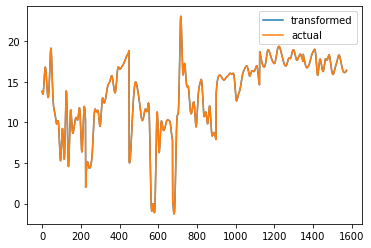

In [7]:
plt.plot(df_unscale_orig["ground_truth"].to_numpy(), label = "transformed")
plt.plot(df["ground_truth"].to_numpy(), label = "actual")
plt.legend()

In [8]:
def fit_model(train_dataset):
    metric = 'root_mean_squared_error'
    label_column = "ground_truth"
    print("train....")
    predictor = task(label=label_column, problem_type='regression', eval_metric=metric, path = "./autoresults10").fit(train_data=train_dataset, presets = "best_quality",  verbosity = 2, time_limit = 3*60, auto_stack=True)
    return predictor
new_predict = fit_model(df_scale)

Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "./autoresults10/"
AutoGluon Version:  0.3.1
Train Data Rows:    1575
Train Data Columns: 52
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2993.36 MB
	Train Data (Original)  Memory Usage: 0.66 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 52 | ['1', '2', '3', '4', '5', ...]
	Types of features in processed data (raw dtype, special dtyp

train....


	0.1s = Fit runtime
	52 features in original data used to generate 52 features in processed data.
	Train Data (Processed) Memory Usage: 0.66 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.19s ...
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	To change this, specify the eval_metric argument of fit()
AutoGluon will fit 2 stack levels (L1 to L2) ...
Fitting 11 L1 models ...
Fitting model: KNeighborsUnif_BAG_L1 ... Training model for up to 119.84s of the 179.8s of remaining time.
	-0.5394	 = Validation score   (root_mean_squared_error)
	0.02s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 119.4s of the 179.37s of remaining time.
	-0.521	 = Validation score   (root_mean_squared_error)
	0.01s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 118.84s of the 178.8s of remainin

In [9]:
new_predict = task.load("autoresults10/")
new_predict.leaderboard()

                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForestMSE_BAG_L2  -0.361107       1.387491  140.326416                0.242656          12.709396            2       True          6
1     WeightedEnsemble_L3  -0.361107       1.388202  140.329153                0.000711           0.002737            3       True          7
2     WeightedEnsemble_L2  -0.438178       0.589799   13.422726                0.000712           0.399762            2       True          5
3  RandomForestMSE_BAG_L1  -0.452207       0.270537   13.008053                0.270537          13.008053            1       True          4
4   KNeighborsDist_BAG_L1  -0.520951       0.318549    0.014911                0.318549           0.014911            1       True          2
5   KNeighborsUnif_BAG_L1  -0.539377       0.235797    0.017916                0.235797           0.017916            1       True          1
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestMSE_BAG_L2,-0.361107,1.387491,140.326416,0.242656,12.709396,2,True,6
1,WeightedEnsemble_L3,-0.361107,1.388202,140.329153,0.000711,0.002737,3,True,7
2,WeightedEnsemble_L2,-0.438178,0.589799,13.422726,0.000712,0.399762,2,True,5
3,RandomForestMSE_BAG_L1,-0.452207,0.270537,13.008053,0.270537,13.008053,1,True,4
4,KNeighborsDist_BAG_L1,-0.520951,0.318549,0.014911,0.318549,0.014911,1,True,2
5,KNeighborsUnif_BAG_L1,-0.539377,0.235797,0.017916,0.235797,0.017916,1,True,1
6,LightGBMXT_BAG_L1,-0.647501,0.319951,114.576139,0.319951,114.576139,1,True,3


In [10]:
def forecast(predictor, input_x, model = None ):
    input_x_no_label = input_x.drop(columns = ["ground_truth"])
    prediction_sequence = predictor.predict(input_x_no_label, model = model).tolist()
    return prediction_sequence

In [11]:
cols = [i for i in range(1,209)]
cols.extend(["time", "ground_truth"])
test_df = pd.DataFrame(columns = cols)

for i in skip:
    test_df = pd.concat([test_df, read_csv("data/data_"+ str(i)+ "/final_dataset2.csv", names = cols)])

test_df.drop(columns = list(range(53, 209)), inplace = True)
    
test_df_time = test_df["time"].to_numpy()
actual_ground_truth = test_df["ground_truth"].to_numpy()
print(type(test_df_time), len(actual_ground_truth))
test_df.drop(columns = "time", inplace = True)
test_df

<class 'numpy.ndarray'> 450


,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,6.994544,6.994544,6.994544,6.994544,8.992985,8.992985,8.992985,8.992985,8.992985,7.993764,...,6.994544,7.993764,7.993764,7.993764,7.993764,6.994544,6.994544,6.994544,12.989867,7.835287
1,7.015450,6.013243,6.013243,6.013243,10.022071,10.022071,10.022071,10.022071,10.022071,9.019864,...,7.015450,7.015450,7.015450,8.017657,8.017657,7.015450,7.015450,7.015450,6.013243,8.280366
2,7.030526,6.026165,6.026165,6.026165,10.043608,10.043608,10.043608,10.043608,10.043608,9.039248,...,7.030526,7.030526,7.030526,8.034887,8.034887,7.030526,15.065413,8.034887,14.061052,8.738751
3,7.069335,7.069335,7.069335,7.069335,9.089145,12.118860,12.118860,12.118860,9.089145,9.089145,...,6.059430,6.059430,11.108955,11.108955,11.108955,12.118860,12.118860,12.118860,6.059430,9.179094
4,7.251873,7.251873,7.251873,7.251873,20.719637,12.431782,12.431782,11.395800,11.395800,6.215891,...,11.395800,11.395800,11.395800,11.395800,11.395800,11.395800,12.431782,12.431782,17.611691,9.624450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,6.994882,6.994882,6.994882,6.994882,14.989033,9.992689,9.992689,6.994882,14.989033,8.993420,...,6.994882,6.994882,6.994882,6.994882,6.994882,7.994151,7.994151,7.994151,8.993420,10.335184
221,7.001900,6.001629,6.001629,6.001629,6.001629,10.002715,10.002715,7.001900,22.005973,9.002443,...,7.001900,7.001900,7.001900,8.002172,8.002172,8.002172,8.002172,9.002443,10.002715,10.354785
222,7.008235,7.008235,7.008235,6.007059,6.007059,21.024705,10.011764,7.008235,6.007059,8.009411,...,7.008235,8.009411,8.009411,8.009411,8.009411,8.009411,8.009411,8.009411,9.010588,10.370687
223,7.005102,7.005102,7.005102,7.005102,6.004373,22.016033,9.006559,7.005102,19.013847,8.005830,...,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,9.006559,10.381345


In [12]:
scale_test = scaler.transform(test_df)
df_scale_test = pd.DataFrame(scale_test, columns = test_df.columns)
df_scale_test


,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,-0.436224,-0.571022,-0.439555,-0.436653,-0.145750,-0.165629,-0.148511,-0.129938,-0.148391,-0.357033,...,-0.578577,-0.311790,-0.286846,-0.289399,-0.354111,-0.445183,-0.432121,-0.452518,0.407327,-1.131365
1,-0.433549,-0.710601,-0.582022,-0.578617,0.002357,0.003401,0.001572,0.001608,0.002880,-0.185958,...,-0.575549,-0.452302,-0.426794,-0.285976,-0.350150,-0.442179,-0.429122,-0.449526,-0.610633,-1.061024
2,-0.431620,-0.708763,-0.580145,-0.576748,0.005456,0.006938,0.004714,0.004361,0.006046,-0.182726,...,-0.573365,-0.450136,-0.424637,-0.283507,-0.347294,-0.440012,0.725674,-0.303634,0.563624,-0.988580
3,-0.426655,-0.560384,-0.428696,-0.425833,-0.131911,0.347802,0.307372,0.269637,-0.134256,-0.174407,...,-0.714005,-0.589611,0.158782,0.156935,0.162323,0.291249,0.302980,0.280825,-0.603894,-0.918987
4,-0.403303,-0.534420,-0.402195,-0.399426,1.541962,0.399200,0.353009,0.177209,0.204812,-0.653447,...,0.058838,0.176833,0.199815,0.198034,0.209876,0.187336,0.347870,0.325607,1.081698,-0.848602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.436180,-0.570974,-0.439506,-0.436604,0.717207,-0.001426,-0.002713,-0.385351,0.733001,-0.190367,...,-0.578528,-0.455256,-0.429736,-0.432516,-0.519705,-0.301527,-0.288724,-0.309464,-0.175795,-0.736277
446,-0.435282,-0.712253,-0.583708,-0.580297,-0.576269,0.000221,-0.001250,-0.384454,1.764460,-0.188862,...,-0.577511,-0.454248,-0.428732,-0.288195,-0.352717,-0.300374,-0.287573,-0.165167,-0.028528,-0.733179
447,-0.434472,-0.569075,-0.437567,-0.579512,-0.575488,1.810602,0.000069,-0.383644,-0.587309,-0.354425,...,-0.576594,-0.309542,-0.284607,-0.287158,-0.351517,-0.299333,-0.286535,-0.307280,-0.173290,-0.730666
448,-0.434873,-0.569521,-0.438022,-0.435126,-0.575875,1.973429,-0.146532,-0.384045,1.324631,-0.355022,...,-0.432116,-0.310057,-0.285120,-0.287671,-0.352111,-0.299848,-0.287049,-0.307792,-0.173878,-0.728982


In [13]:
df_scale_test_copy = df_scale_test.copy()
unscale_test_orig = scaler.inverse_transform(df_scale_test_copy)
df_unscale_test_orig = pd.DataFrame(unscale_test_orig, columns = df_scale_test_copy.columns)
df_unscale_test_orig

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,6.994544,6.994544,6.994544,6.994544,8.992985,8.992985,8.992985,8.992985,8.992985,7.993764,...,6.994544,7.993764,7.993764,7.993764,7.993764,6.994544,6.994544,6.994544,12.989867,7.835287
1,7.015450,6.013243,6.013243,6.013243,10.022071,10.022071,10.022071,10.022071,10.022071,9.019864,...,7.015450,7.015450,7.015450,8.017657,8.017657,7.015450,7.015450,7.015450,6.013243,8.280366
2,7.030526,6.026165,6.026165,6.026165,10.043608,10.043608,10.043608,10.043608,10.043608,9.039248,...,7.030526,7.030526,7.030526,8.034887,8.034887,7.030526,15.065413,8.034887,14.061052,8.738751
3,7.069335,7.069335,7.069335,7.069335,9.089145,12.118860,12.118860,12.118860,9.089145,9.089145,...,6.059430,6.059430,11.108955,11.108955,11.108955,12.118860,12.118860,12.118860,6.059430,9.179094
4,7.251873,7.251873,7.251873,7.251873,20.719637,12.431782,12.431782,11.395800,11.395800,6.215891,...,11.395800,11.395800,11.395800,11.395800,11.395800,11.395800,12.431782,12.431782,17.611691,9.624450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,6.994882,6.994882,6.994882,6.994882,14.989033,9.992689,9.992689,6.994882,14.989033,8.993420,...,6.994882,6.994882,6.994882,6.994882,6.994882,7.994151,7.994151,7.994151,8.993420,10.335184
446,7.001900,6.001629,6.001629,6.001629,6.001629,10.002715,10.002715,7.001900,22.005973,9.002443,...,7.001900,7.001900,7.001900,8.002172,8.002172,8.002172,8.002172,9.002443,10.002715,10.354785
447,7.008235,7.008235,7.008235,6.007059,6.007059,21.024705,10.011764,7.008235,6.007059,8.009411,...,7.008235,8.009411,8.009411,8.009411,8.009411,8.009411,8.009411,8.009411,9.010588,10.370687
448,7.005102,7.005102,7.005102,7.005102,6.004373,22.016033,9.006559,7.005102,19.013847,8.005830,...,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,9.006559,10.381345


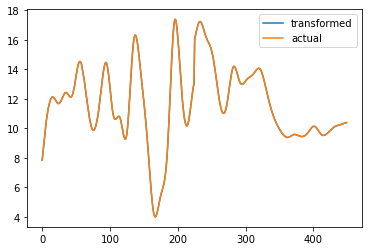

In [14]:
plt.plot(df_unscale_test_orig["ground_truth"].to_numpy(), label = "transformed")
plt.plot(test_df["ground_truth"].to_numpy(), label = "actual")
plt.legend()

In [15]:
output = forecast(new_predict, df_scale_test)
#output

In [16]:
print(output[:2])

[-0.0031337973196059465, -0.4867534339427948]


In [17]:
df_scale_test["ground_truth"] = output
df_scale_test

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,-0.436224,-0.571022,-0.439555,-0.436653,-0.145750,-0.165629,-0.148511,-0.129938,-0.148391,-0.357033,...,-0.578577,-0.311790,-0.286846,-0.289399,-0.354111,-0.445183,-0.432121,-0.452518,0.407327,-0.003134
1,-0.433549,-0.710601,-0.582022,-0.578617,0.002357,0.003401,0.001572,0.001608,0.002880,-0.185958,...,-0.575549,-0.452302,-0.426794,-0.285976,-0.350150,-0.442179,-0.429122,-0.449526,-0.610633,-0.486753
2,-0.431620,-0.708763,-0.580145,-0.576748,0.005456,0.006938,0.004714,0.004361,0.006046,-0.182726,...,-0.573365,-0.450136,-0.424637,-0.283507,-0.347294,-0.440012,0.725674,-0.303634,0.563624,-0.471810
3,-0.426655,-0.560384,-0.428696,-0.425833,-0.131911,0.347802,0.307372,0.269637,-0.134256,-0.174407,...,-0.714005,-0.589611,0.158782,0.156935,0.162323,0.291249,0.302980,0.280825,-0.603894,-0.134698
4,-0.403303,-0.534420,-0.402195,-0.399426,1.541962,0.399200,0.353009,0.177209,0.204812,-0.653447,...,0.058838,0.176833,0.199815,0.198034,0.209876,0.187336,0.347870,0.325607,1.081698,-0.307537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.436180,-0.570974,-0.439506,-0.436604,0.717207,-0.001426,-0.002713,-0.385351,0.733001,-0.190367,...,-0.578528,-0.455256,-0.429736,-0.432516,-0.519705,-0.301527,-0.288724,-0.309464,-0.175795,-0.477118
446,-0.435282,-0.712253,-0.583708,-0.580297,-0.576269,0.000221,-0.001250,-0.384454,1.764460,-0.188862,...,-0.577511,-0.454248,-0.428732,-0.288195,-0.352717,-0.300374,-0.287573,-0.165167,-0.028528,-0.462832
447,-0.434472,-0.569075,-0.437567,-0.579512,-0.575488,1.810602,0.000069,-0.383644,-0.587309,-0.354425,...,-0.576594,-0.309542,-0.284607,-0.287158,-0.351517,-0.299333,-0.286535,-0.307280,-0.173290,0.223818
448,-0.434873,-0.569521,-0.438022,-0.435126,-0.575875,1.973429,-0.146532,-0.384045,1.324631,-0.355022,...,-0.432116,-0.310057,-0.285120,-0.287671,-0.352111,-0.299848,-0.287049,-0.307792,-0.173878,-0.513787


In [18]:
unscale_test = scaler.inverse_transform(df_scale_test)
df_unscale_test = pd.DataFrame(unscale_test, columns = df_scale_test.columns)
df_unscale_test

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,6.994544,6.994544,6.994544,6.994544,8.992985,8.992985,8.992985,8.992985,8.992985,7.993764,...,6.994544,7.993764,7.993764,7.993764,7.993764,6.994544,6.994544,6.994544,12.989867,14.974112
1,7.015450,6.013243,6.013243,6.013243,10.022071,10.022071,10.022071,10.022071,10.022071,9.019864,...,7.015450,7.015450,7.015450,8.017657,8.017657,7.015450,7.015450,7.015450,6.013243,11.914032
2,7.030526,6.026165,6.026165,6.026165,10.043608,10.043608,10.043608,10.043608,10.043608,9.039248,...,7.030526,7.030526,7.030526,8.034887,8.034887,7.030526,15.065413,8.034887,14.061052,12.008587
3,7.069335,7.069335,7.069335,7.069335,9.089145,12.118860,12.118860,12.118860,9.089145,9.089145,...,6.059430,6.059430,11.108955,11.108955,11.108955,12.118860,12.118860,12.118860,6.059430,14.141645
4,7.251873,7.251873,7.251873,7.251873,20.719637,12.431782,12.431782,11.395800,11.395800,6.215891,...,11.395800,11.395800,11.395800,11.395800,11.395800,11.395800,12.431782,12.431782,17.611691,13.048012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,6.994882,6.994882,6.994882,6.994882,14.989033,9.992689,9.992689,6.994882,14.989033,8.993420,...,6.994882,6.994882,6.994882,6.994882,6.994882,7.994151,7.994151,7.994151,8.993420,11.974999
446,7.001900,6.001629,6.001629,6.001629,6.001629,10.002715,10.002715,7.001900,22.005973,9.002443,...,7.001900,7.001900,7.001900,8.002172,8.002172,8.002172,8.002172,9.002443,10.002715,12.065394
447,7.008235,7.008235,7.008235,6.007059,6.007059,21.024705,10.011764,7.008235,6.007059,8.009411,...,7.008235,8.009411,8.009411,8.009411,8.009411,8.009411,8.009411,8.009411,9.010588,16.410135
448,7.005102,7.005102,7.005102,7.005102,6.004373,22.016033,9.006559,7.005102,19.013847,8.005830,...,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,8.005830,9.006559,11.742978


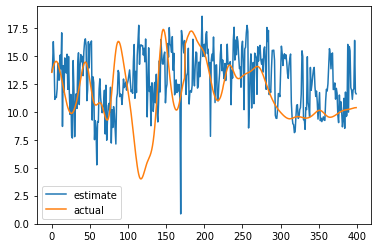

In [19]:
plt.plot(df_unscale_test["ground_truth"].to_numpy()[50:], label = "estimate")
plt.plot(df_unscale_test_orig["ground_truth"].to_numpy()[50:], label = "actual")
plt.legend()

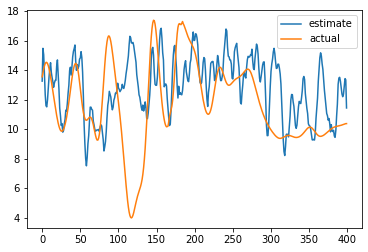

In [20]:
from scipy.signal import savgol_filter
smooth_estimate = savgol_filter(df_unscale_test["ground_truth"][50:], 21, 6) # window size 51, polynomial order 3
smooth_ground = savgol_filter(df_unscale_test_orig["ground_truth"][50:], 21, 6) # window size 51, polynomial order 3
plt.plot(smooth_estimate, label = "estimate")
plt.plot(smooth_ground, label = "actual")
plt.legend()

In [21]:
test_sam = new_predict.leaderboard(data = df_scale_test_copy)

                    model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   -0.473954  -0.438178        0.584877       0.589799   13.422726                 0.002835                0.000712           0.399762            2       True          5
1  RandomForestMSE_BAG_L1   -0.487814  -0.452207        0.354845       0.270537   13.008053                 0.354845                0.270537          13.008053            1       True          4
2       LightGBMXT_BAG_L1   -0.501806  -0.647501        0.586638       0.319951  114.576139                 0.586638                0.319951         114.576139            1       True          3
3   KNeighborsUnif_BAG_L1   -0.578093  -0.539377        0.081443       0.235797    0.017916                 0.081443                0.235797           0.017916            1       True          1
4  RandomForestMSE_BAG_L2

In [22]:
new_predict.get_model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'RandomForestMSE_BAG_L1',
 'WeightedEnsemble_L2',
 'RandomForestMSE_BAG_L2',
 'WeightedEnsemble_L3']

In [23]:
test_sam["model"].to_list()

['WeightedEnsemble_L2',
 'RandomForestMSE_BAG_L1',
 'LightGBMXT_BAG_L1',
 'KNeighborsUnif_BAG_L1',
 'RandomForestMSE_BAG_L2',
 'WeightedEnsemble_L3',
 'KNeighborsDist_BAG_L1']

In [24]:
#predictor

                    model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       LightGBMXT_BAG_L1   -0.575797  -0.647501        0.634799       0.319951  114.576139                 0.634799                0.319951         114.576139            1       True          3
1     WeightedEnsemble_L2   -0.581896  -0.438178        0.292693       0.589799   13.422726                 0.002782                0.000712           0.399762            2       True          5
2  RandomForestMSE_BAG_L1   -0.586880  -0.452207        0.245162       0.270537   13.008053                 0.245162                0.270537          13.008053            1       True          4
3  RandomForestMSE_BAG_L2   -0.679704  -0.361107        1.323040       1.387491  140.326416                 0.265848                0.242656          12.709396            2       True          6
4     WeightedEnsemble_L3

Evaluation: root_mean_squared_error on test data: -0.5757967928775636
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5757967928775636,
    "mean_squared_error": -0.33154194668808784,
    "mean_absolute_error": -0.4458981699727571,
    "r2": -0.569407954102437,
    "pearsonr": -0.022872694621941272,
    "median_absolute_error": -0.3690012957524724
}


{'root_mean_squared_error': -0.5757967928775636, 'mean_squared_error': -0.33154194668808784, 'mean_absolute_error': -0.4458981699727571, 'r2': -0.569407954102437, 'pearsonr': -0.022872694621941272, 'median_absolute_error': -0.3690012957524724, 'name': 'LightGBMXT_BAG_L1'}


<Figure size 1280x720 with 0 Axes>

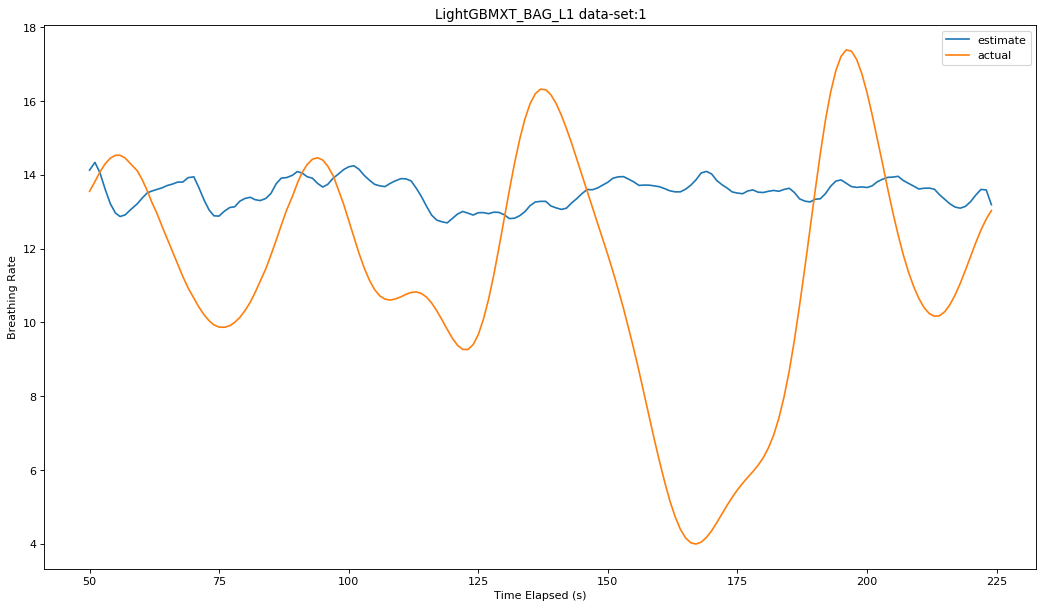

data 10 model WeightedEnsemble_L2


Evaluation: root_mean_squared_error on test data: -0.5818957772227951
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5818957772227951,
    "mean_squared_error": -0.3386026955497208,
    "mean_absolute_error": -0.4365355955890873,
    "r2": -0.6028311620435776,
    "pearsonr": 0.0036937010188181347,
    "median_absolute_error": -0.35240730325272374
}


{'root_mean_squared_error': -0.5818957772227951, 'mean_squared_error': -0.3386026955497208, 'mean_absolute_error': -0.4365355955890873, 'r2': -0.6028311620435776, 'pearsonr': 0.0036937010188181347, 'median_absolute_error': -0.35240730325272374, 'name': 'WeightedEnsemble_L2'}


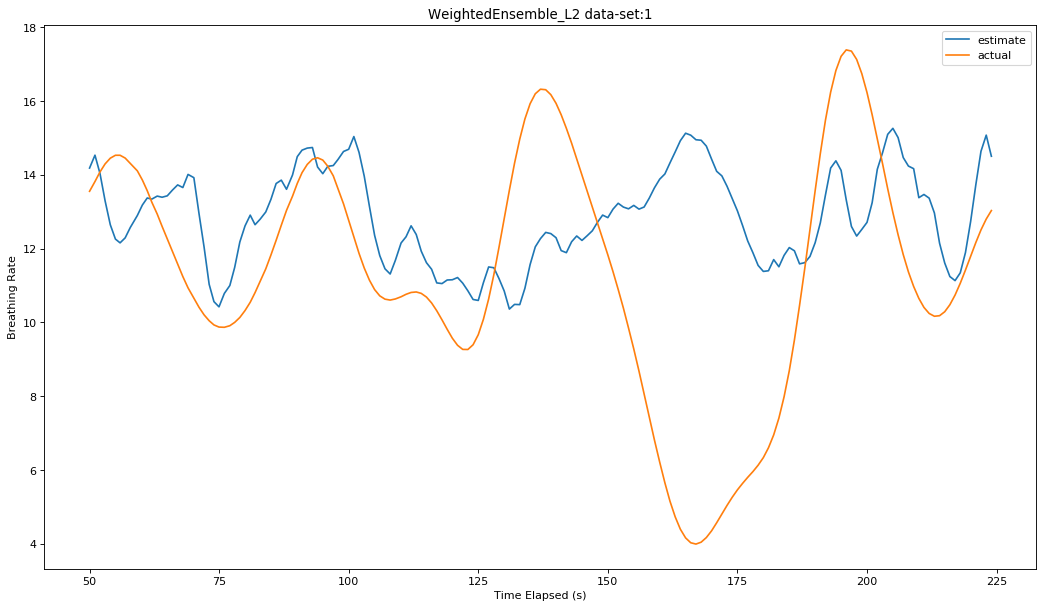

data 10 model RandomForestMSE_BAG_L1


Evaluation: root_mean_squared_error on test data: -0.5868801408764656
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5868801408764656,
    "mean_squared_error": -0.34442829975518,
    "mean_absolute_error": -0.43547965951840745,
    "r2": -0.6304076110233556,
    "pearsonr": 0.04610558014710472,
    "median_absolute_error": -0.3495557308607541
}


{'root_mean_squared_error': -0.5868801408764656, 'mean_squared_error': -0.34442829975518, 'mean_absolute_error': -0.43547965951840745, 'r2': -0.6304076110233556, 'pearsonr': 0.04610558014710472, 'median_absolute_error': -0.3495557308607541, 'name': 'RandomForestMSE_BAG_L1'}


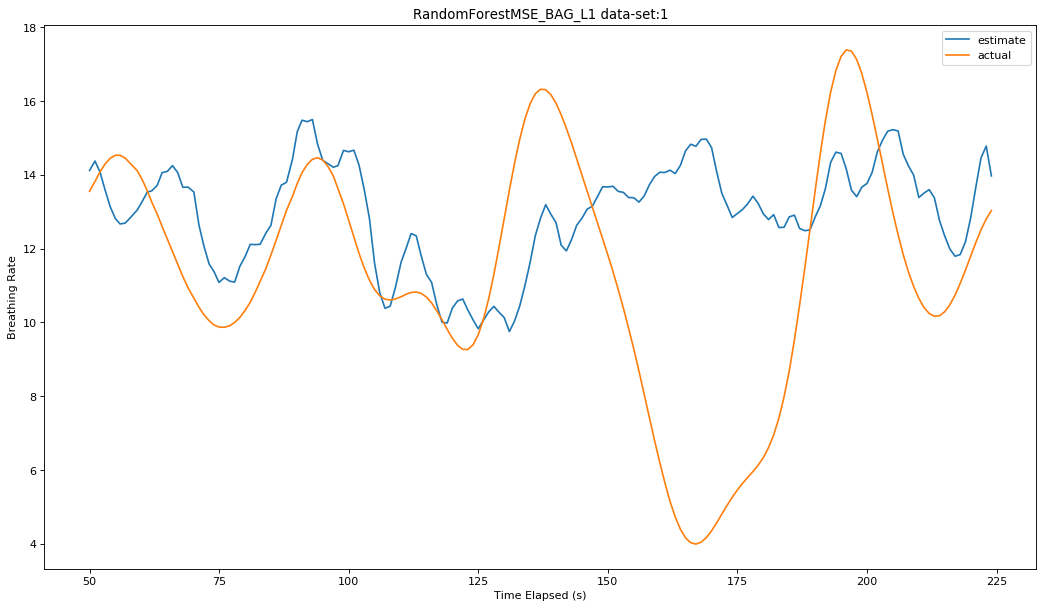

data 10 model RandomForestMSE_BAG_L2


Evaluation: root_mean_squared_error on test data: -0.6797043347658488
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.6797043347658488,
    "mean_squared_error": -0.46199798269948505,
    "mean_absolute_error": -0.5214652073189034,
    "r2": -1.1869429074384548,
    "pearsonr": 0.005124880698205972,
    "median_absolute_error": -0.4161239614090857
}


{'root_mean_squared_error': -0.6797043347658488, 'mean_squared_error': -0.46199798269948505, 'mean_absolute_error': -0.5214652073189034, 'r2': -1.1869429074384548, 'pearsonr': 0.005124880698205972, 'median_absolute_error': -0.4161239614090857, 'name': 'RandomForestMSE_BAG_L2'}


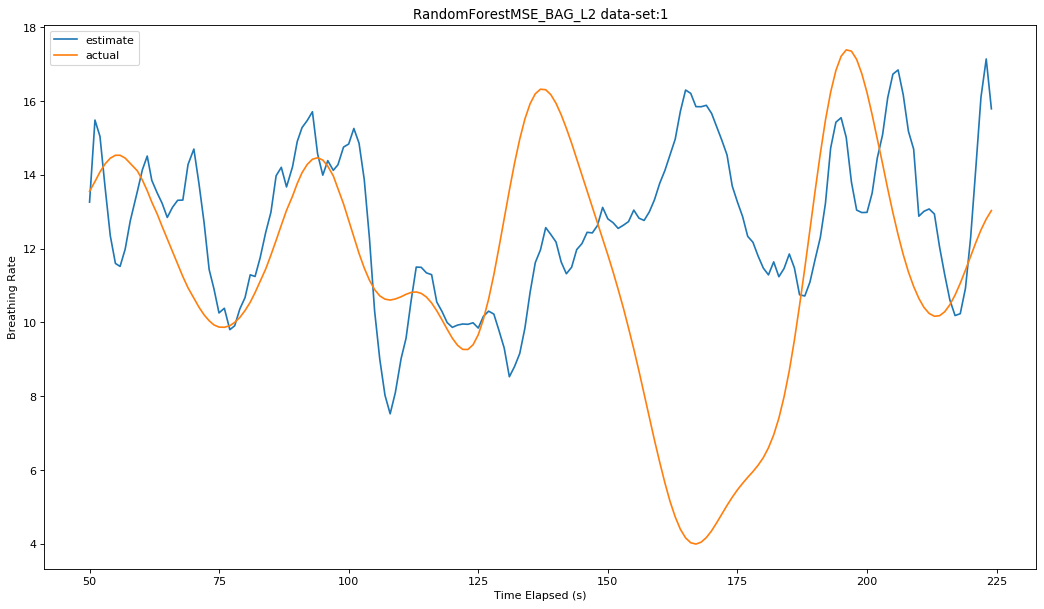

data 10 model WeightedEnsemble_L3


Evaluation: root_mean_squared_error on test data: -0.6797043347658488
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.6797043347658488,
    "mean_squared_error": -0.46199798269948505,
    "mean_absolute_error": -0.5214652073189034,
    "r2": -1.1869429074384548,
    "pearsonr": 0.005124880698205972,
    "median_absolute_error": -0.4161239614090857
}


{'root_mean_squared_error': -0.6797043347658488, 'mean_squared_error': -0.46199798269948505, 'mean_absolute_error': -0.5214652073189034, 'r2': -1.1869429074384548, 'pearsonr': 0.005124880698205972, 'median_absolute_error': -0.4161239614090857, 'name': 'WeightedEnsemble_L3'}


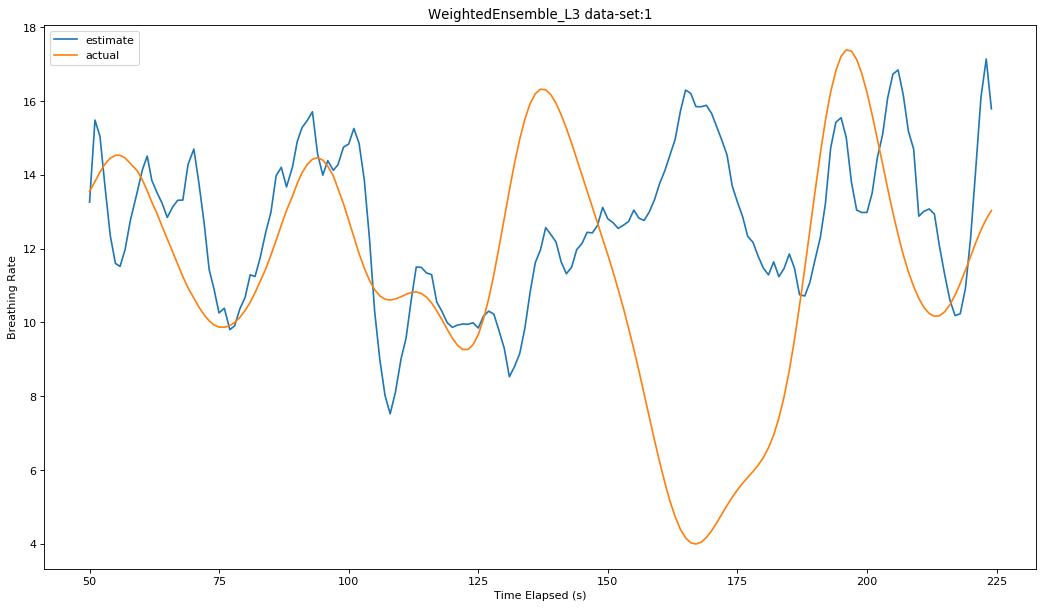

data 10 model KNeighborsUnif_BAG_L1


Evaluation: root_mean_squared_error on test data: -0.6970583944320229
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.6970583944320229,
    "mean_squared_error": -0.4858904052481495,
    "mean_absolute_error": -0.5414646839379594,
    "r2": -1.3000415918288413,
    "pearsonr": -0.05666621529171728,
    "median_absolute_error": -0.4565431965267075
}


{'root_mean_squared_error': -0.6970583944320229, 'mean_squared_error': -0.4858904052481495, 'mean_absolute_error': -0.5414646839379594, 'r2': -1.3000415918288413, 'pearsonr': -0.05666621529171728, 'median_absolute_error': -0.4565431965267075, 'name': 'KNeighborsUnif_BAG_L1'}


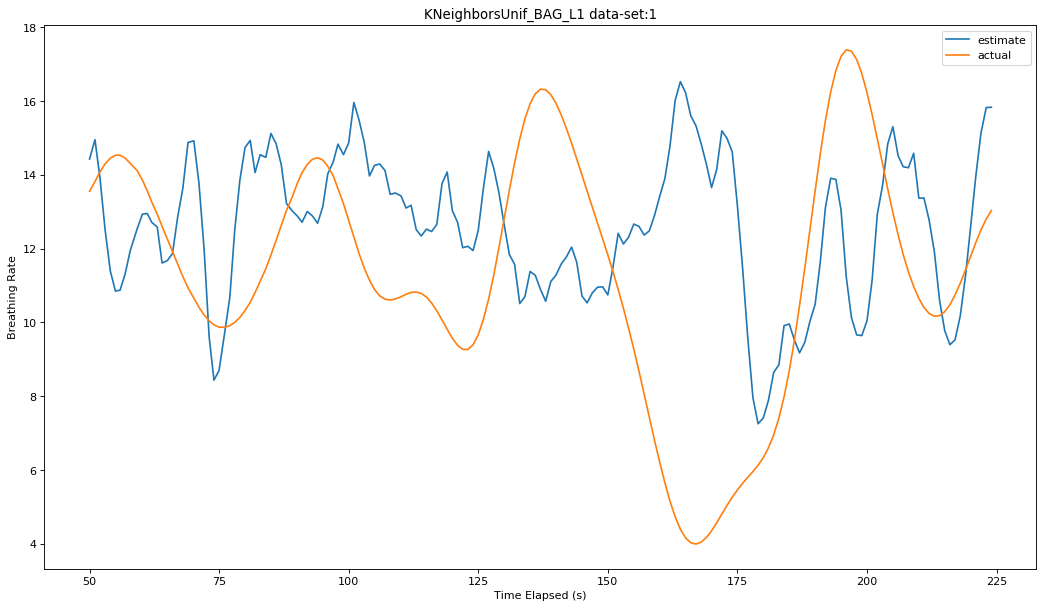

Evaluation: root_mean_squared_error on test data: -0.6995659579899968
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.6995659579899968,
    "mean_squared_error": -0.48939252957846197,
    "mean_absolute_error": -0.5424772916183862,
    "r2": -1.316619469334697,
    "pearsonr": -0.061653931495305625,
    "median_absolute_error": -0.4534186180573784
}


data 10 model KNeighborsDist_BAG_L1
{'root_mean_squared_error': -0.6995659579899968, 'mean_squared_error': -0.48939252957846197, 'mean_absolute_error': -0.5424772916183862, 'r2': -1.316619469334697, 'pearsonr': -0.061653931495305625, 'median_absolute_error': -0.4534186180573784, 'name': 'KNeighborsDist_BAG_L1'}


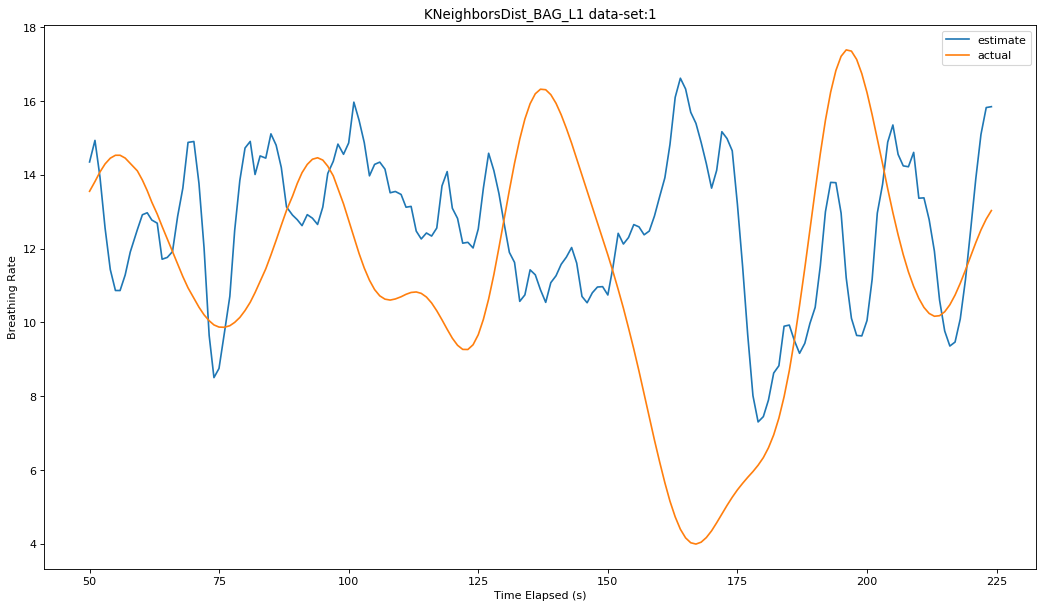

                    model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   -0.332660  -0.438178        0.379841       0.589799   13.422726                 0.002617                0.000712           0.399762            2       True          5
1  RandomForestMSE_BAG_L1   -0.362624  -0.452207        0.334337       0.270537   13.008053                 0.334337                0.270537          13.008053            1       True          4
2       LightGBMXT_BAG_L1   -0.414822  -0.647501        0.633166       0.319951  114.576139                 0.633166                0.319951         114.576139            1       True          3
3   KNeighborsDist_BAG_L1   -0.426810  -0.520951        0.042888       0.318549    0.014911                 0.042888                0.318549           0.014911            1       True          2
4   KNeighborsUnif_BAG_L1

Evaluation: root_mean_squared_error on test data: -0.3326598468735174
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.3326598468735174,
    "mean_squared_error": -0.11066257372191204,
    "mean_absolute_error": -0.27246874917901454,
    "r2": 0.1879882828607632,
    "pearsonr": 0.5994898998396664,
    "median_absolute_error": -0.24173940751474088
}


{'root_mean_squared_error': -0.3326598468735174, 'mean_squared_error': -0.11066257372191204, 'mean_absolute_error': -0.27246874917901454, 'r2': 0.1879882828607632, 'pearsonr': 0.5994898998396664, 'median_absolute_error': -0.24173940751474088, 'name': 'WeightedEnsemble_L2'}


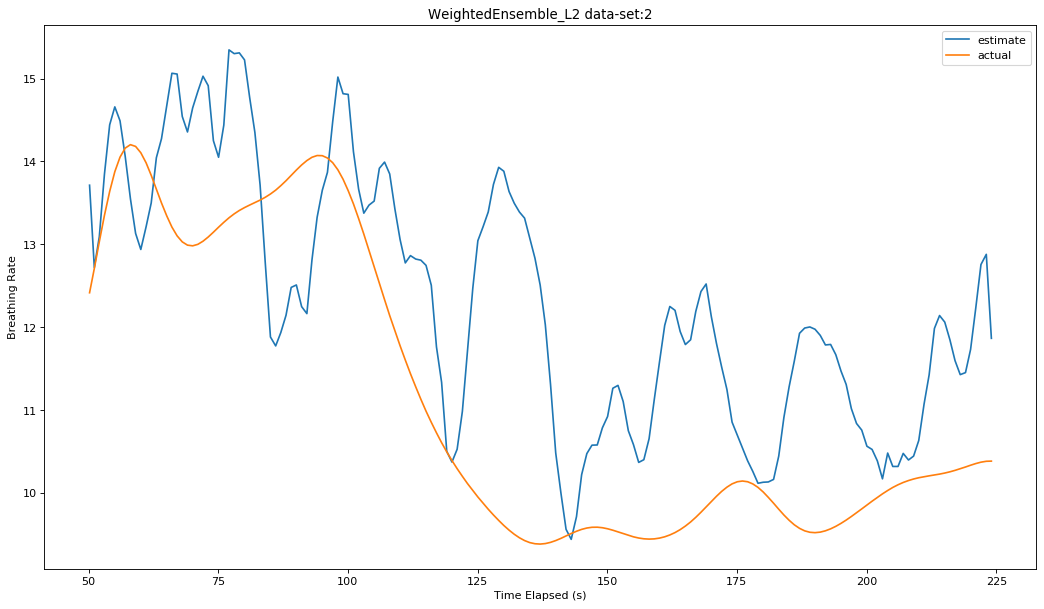

data 13 model RandomForestMSE_BAG_L1


Evaluation: root_mean_squared_error on test data: -0.3626238287827494
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.3626238287827494,
    "mean_squared_error": -0.13149604120106076,
    "mean_absolute_error": -0.30069622814176217,
    "r2": 0.03511799317981479,
    "pearsonr": 0.5588317412175677,
    "median_absolute_error": -0.2679250207622397
}


{'root_mean_squared_error': -0.3626238287827494, 'mean_squared_error': -0.13149604120106076, 'mean_absolute_error': -0.30069622814176217, 'r2': 0.03511799317981479, 'pearsonr': 0.5588317412175677, 'median_absolute_error': -0.2679250207622397, 'name': 'RandomForestMSE_BAG_L1'}


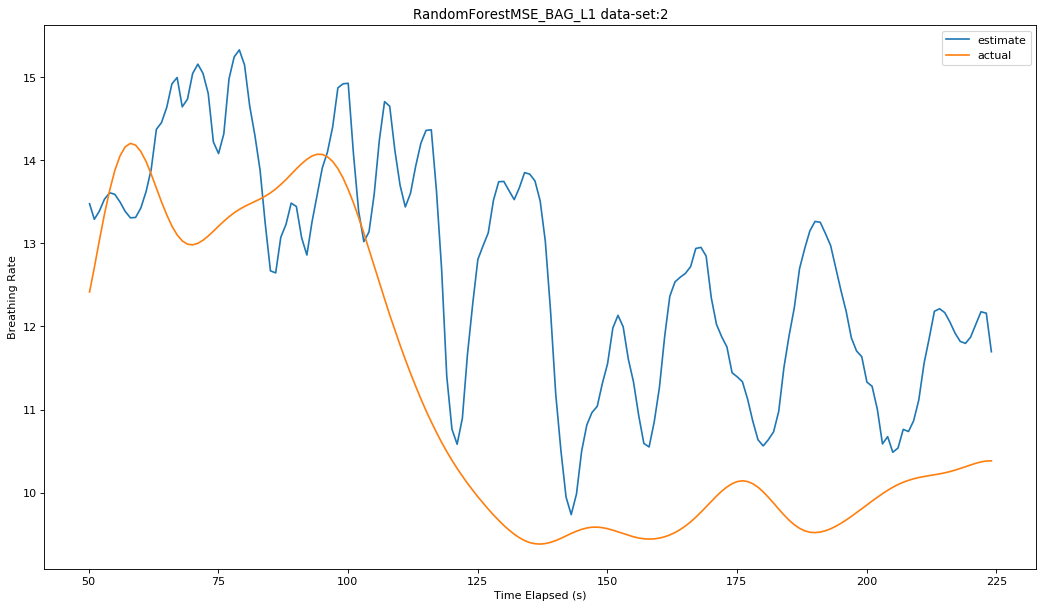

data 13 model LightGBMXT_BAG_L1


Evaluation: root_mean_squared_error on test data: -0.4148216575804168
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.4148216575804168,
    "mean_squared_error": -0.17207700759776454,
    "mean_absolute_error": -0.3605591480313522,
    "r2": -0.26265404571893636,
    "pearsonr": 0.6826049350792697,
    "median_absolute_error": -0.4183307953714712
}


{'root_mean_squared_error': -0.4148216575804168, 'mean_squared_error': -0.17207700759776454, 'mean_absolute_error': -0.3605591480313522, 'r2': -0.26265404571893636, 'pearsonr': 0.6826049350792697, 'median_absolute_error': -0.4183307953714712, 'name': 'LightGBMXT_BAG_L1'}


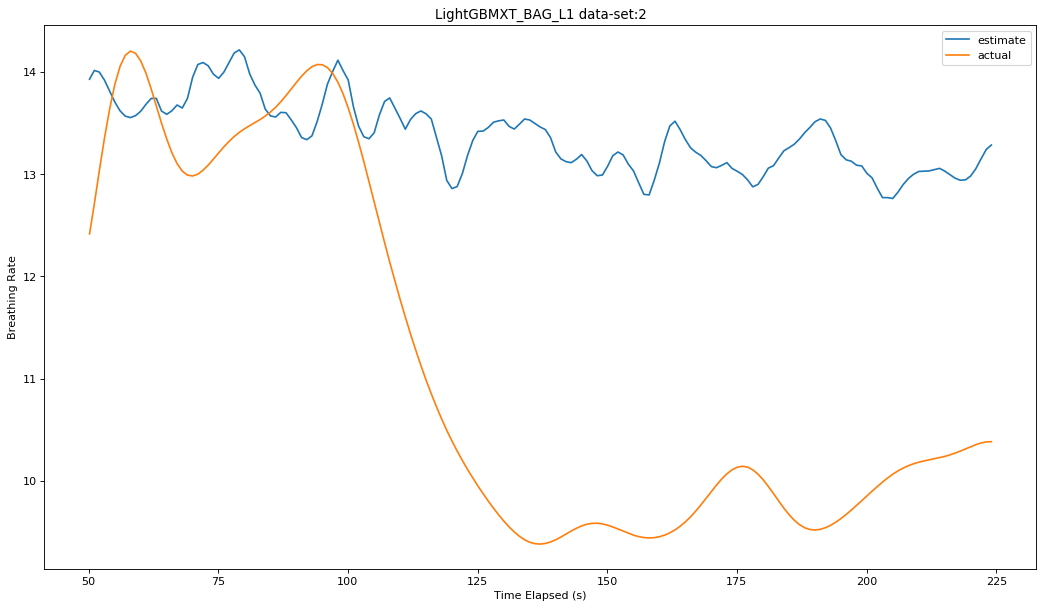

Evaluation: root_mean_squared_error on test data: -0.42681015598020655
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.42681015598020655,
    "mean_squared_error": -0.18216690924784823,
    "mean_absolute_error": -0.3352542624844014,
    "r2": -0.3366909860239691,
    "pearsonr": 0.5056133642384243,
    "median_absolute_error": -0.24019017128750006
}


data 13 model KNeighborsDist_BAG_L1
{'root_mean_squared_error': -0.42681015598020655, 'mean_squared_error': -0.18216690924784823, 'mean_absolute_error': -0.3352542624844014, 'r2': -0.3366909860239691, 'pearsonr': 0.5056133642384243, 'median_absolute_error': -0.24019017128750006, 'name': 'KNeighborsDist_BAG_L1'}


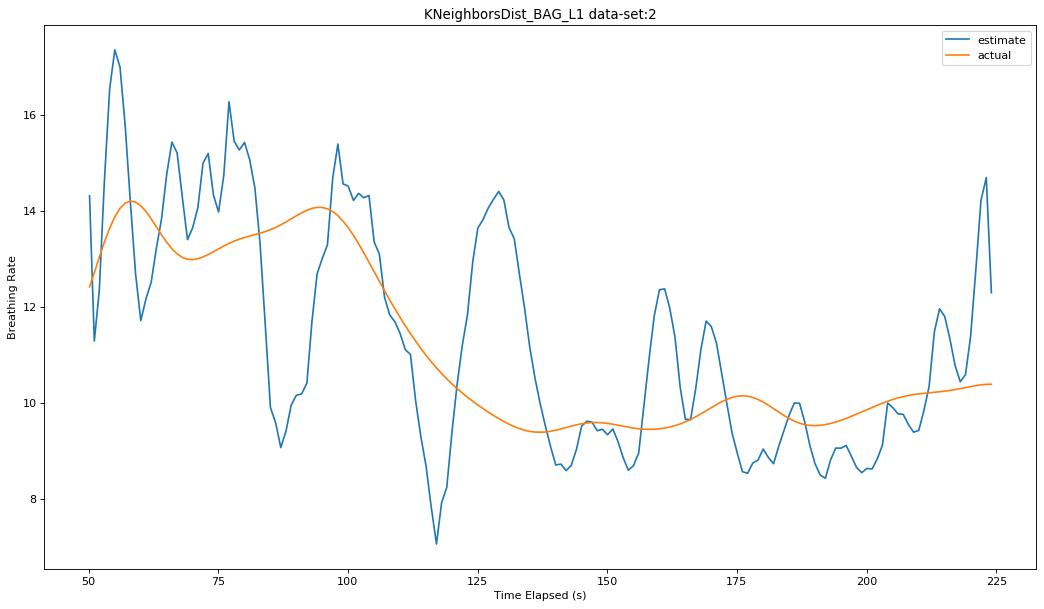

Evaluation: root_mean_squared_error on test data: -0.42719130299526153
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.42719130299526153,
    "mean_squared_error": -0.18249240935478933,
    "mean_absolute_error": -0.3354283818461811,
    "r2": -0.33907941683554976,
    "pearsonr": 0.5044374702753789,
    "median_absolute_error": -0.24443968095741064
}


data 13 model KNeighborsUnif_BAG_L1
{'root_mean_squared_error': -0.42719130299526153, 'mean_squared_error': -0.18249240935478933, 'mean_absolute_error': -0.3354283818461811, 'r2': -0.33907941683554976, 'pearsonr': 0.5044374702753789, 'median_absolute_error': -0.24443968095741064, 'name': 'KNeighborsUnif_BAG_L1'}


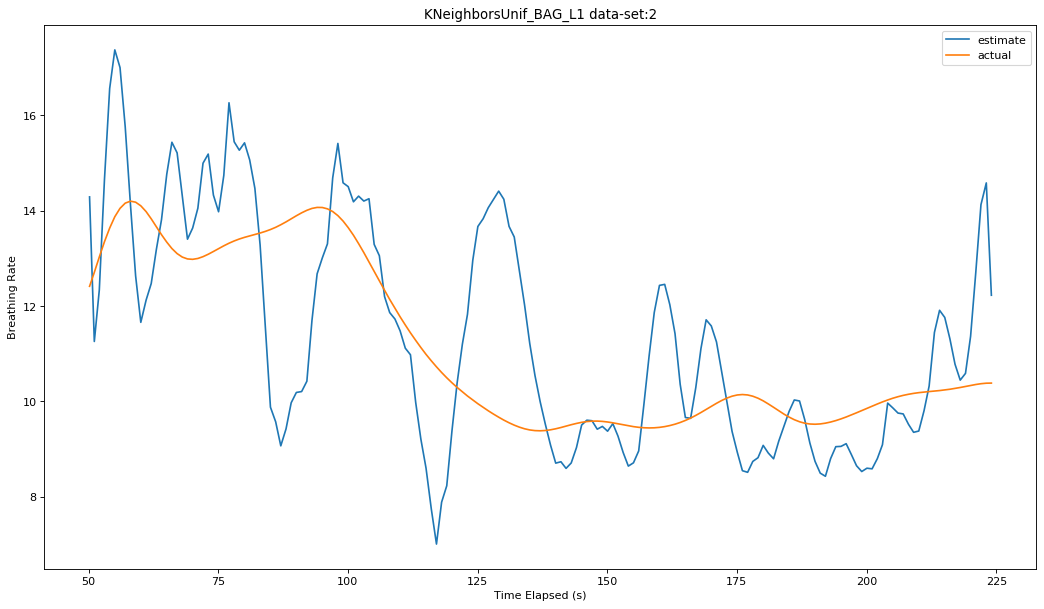

data 13 model RandomForestMSE_BAG_L2


Evaluation: root_mean_squared_error on test data: -0.4547400823657184
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.4547400823657184,
    "mean_squared_error": -0.20678854250998033,
    "mean_absolute_error": -0.3582735112853355,
    "r2": -0.5173578007521145,
    "pearsonr": 0.39849019579689016,
    "median_absolute_error": -0.26168671722080994
}


{'root_mean_squared_error': -0.4547400823657184, 'mean_squared_error': -0.20678854250998033, 'mean_absolute_error': -0.3582735112853355, 'r2': -0.5173578007521145, 'pearsonr': 0.39849019579689016, 'median_absolute_error': -0.26168671722080994, 'name': 'RandomForestMSE_BAG_L2'}


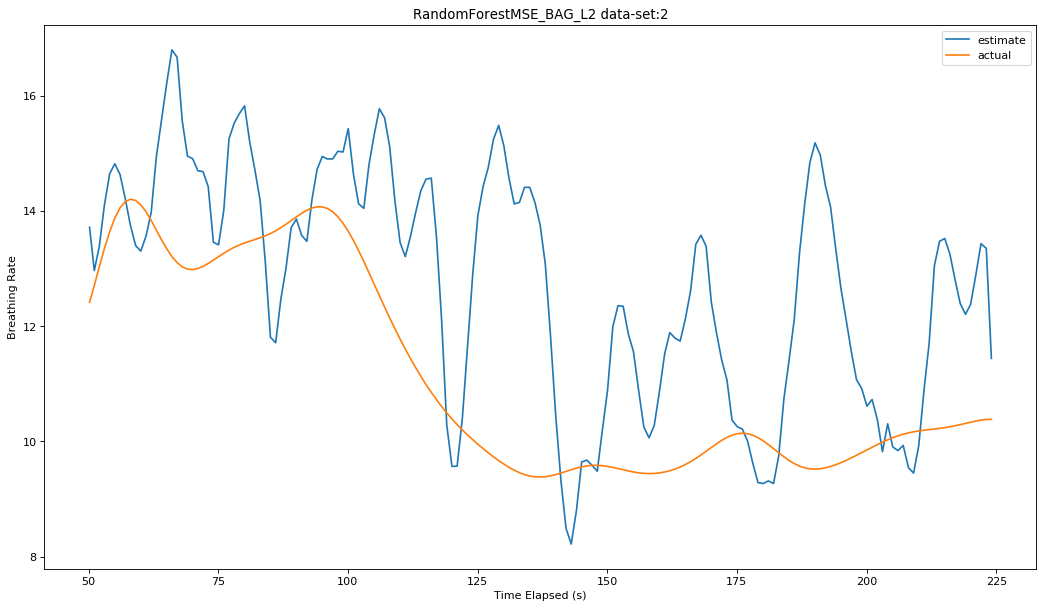

data 13 model WeightedEnsemble_L3


Evaluation: root_mean_squared_error on test data: -0.4547400823657184
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.4547400823657184,
    "mean_squared_error": -0.20678854250998033,
    "mean_absolute_error": -0.3582735112853355,
    "r2": -0.5173578007521145,
    "pearsonr": 0.39849019579689016,
    "median_absolute_error": -0.26168671722080994
}


{'root_mean_squared_error': -0.4547400823657184, 'mean_squared_error': -0.20678854250998033, 'mean_absolute_error': -0.3582735112853355, 'r2': -0.5173578007521145, 'pearsonr': 0.39849019579689016, 'median_absolute_error': -0.26168671722080994, 'name': 'WeightedEnsemble_L3'}


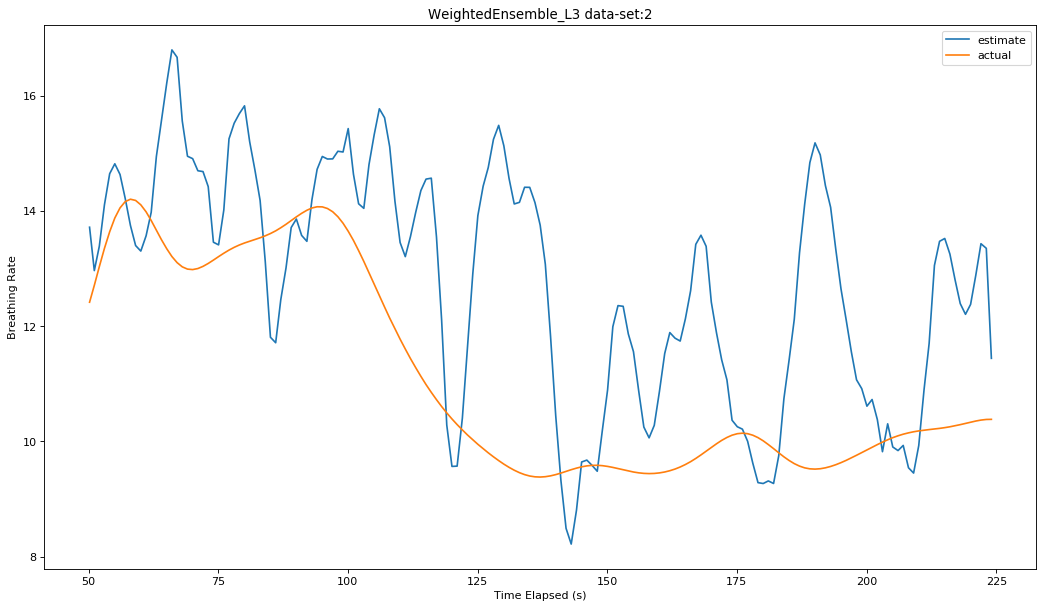

In [25]:
cols = [i for i in range(1,209)]
cols.extend(["time", "ground_truth"])

from matplotlib.pyplot import figure
figure(figsize=(16, 9), dpi=80)

model_res = dict()

for i in skip:
    test_df = pd.DataFrame(columns = cols)
    test_df = pd.concat([test_df, read_csv("data/data_"+ str(i)+ "/final_dataset2.csv", names = cols)])
    
    test_df_time = test_df["time"].to_list()
    test_df_time = test_df_time[50:]
    
    test_df.drop(columns = list(range(53, 209)), inplace = True)
    test_df.drop(columns = "time", inplace = True)
    
    scale_test = scaler.transform(test_df)
    df_scale_test = pd.DataFrame(scale_test, columns = test_df.columns)
    
    df_scale_test_copy = df_scale_test.copy()
    unscale_test_orig = scaler.inverse_transform(df_scale_test_copy)
    df_unscale_test_orig = pd.DataFrame(unscale_test_orig, columns = df_scale_test_copy.columns)
    
    models = new_predict.leaderboard(data = df_scale_test_copy)
    print(models)
    models = models["model"].to_list()
    
    for modelName in models:
        output = forecast(new_predict, df_scale_test, modelName)
        df_scale_test["ground_truth"] = output
        
        unscale_test = scaler.inverse_transform(df_scale_test)
        df_unscale_test = pd.DataFrame(unscale_test, columns = df_scale_test.columns)
        
        smooth_estimate = savgol_filter(df_unscale_test["ground_truth"][50:], 21, 6) # window size 51, polynomial order 3
        smooth_ground = savgol_filter(df_unscale_test_orig["ground_truth"][50:], 21, 6) # window size 51, polynomial order 3
        print("data", i, "model", modelName)
        
        if i not in model_res:
            model_res[i] = dict()
            
        evaluate_data = new_predict.evaluate(df_scale_test_copy, model = modelName)
        evaluate_data["name"] = modelName
        model_res[i][modelName] = evaluate_data
        
        print(model_res[i][modelName])
        figure(figsize=(16, 9), dpi=80)
        plt.plot(test_df_time, smooth_estimate, label = "estimate")
        plt.plot(test_df_time, smooth_ground, label = "actual")
        plt.xlabel("Time Elapsed (s)")
        plt.ylabel("Breathing Rate")
        plt.title(modelName + " data-set:" + str(skip.index(i) + 1) )
        plt.legend()
        plt.savefig("data/images/autogluon/" + modelName + " data-set:" + str(i) + ".png")  
        plt.show()

In [26]:
model_res

import json
with open('data/images/autogluon/evaluate-data-10-13.json', 'w') as fp:
    json.dump(model_res, fp)